In [25]:
#meta 6/1/2022 SARIMAX: myIntroduction ($note: together with .pdf)
#started from doc_statsmodels__TimeSeries_SARIMAX_Introduction.ipynb
#This notebook replicates examples from the Stata ARIMA time series estimation and postestimation documentation.
#refer to src https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

#original doc @ references_original/Stata
#refer to http://www.stata.com/manuals13/tsarima.pdf or https://www.stata.com/features/time-series/ts-arima.pdf

#$my
#history
# 6/1/2022 myLearn Statsmodels documentation
#      Start with replicated nb & go over documenation: 
#        1) doc_statsmodels__TimeSeries_SARIMAX_Introduction.pdf  
#        2) references_original/Stata/tsarima.pdf

#$ac book Francesca Lazzeri Machine-Learning-for-Time-Series-Forecasting
#refer to https://github.com/FrancescaLazzeri/Machine-Learning-for-Time-Series-Forecasting
#Notebooks/Chapter%203%20-%20Time%20Series%20Data%20Preparation%20(1).ipynb


#previously in doc_statsmodels__TimeSeries_SARIMAX_Introduction.ipynb
# 5/31/2022 Statsmodels documentation
#      Replicated nb, goes together with documenation .pdf


#References: a good place to start
#refer to https://www.statsmodels.org/dev/examples/index.html 


In [26]:
import numpy as np
import pandas as pd
from datetime import datetime
import requests
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

#from scipy.stats import norm
import statsmodels.api as sm
import matplotlib  #for decomposition plots


# SARIMAX: Introduction
This notebook replicates examples from the Stata ARIMA time series estimation and postestimation documentation.  
$note: together with .pdf


## 1. First, we replicate the four estimation examples
http://www.stata.com/manuals13/tsarima.pdf

1. `ARIMA(1,1,1)` model on the U.S. Wholesale Price Index (WPI) dataset.

2. Variation of example 1 which adds an `MA(4)` term to the `ARIMA(1,1,1)` specification to allow for an additive seasonal effect.

3. `ARIMA(2,1,0) x (1,1,0,12)` model of monthly airline data. This example allows a multiplicative seasonal effect.

4. `ARMA(1,1)` model with exogenous regressors; describes consumption as an autoregressive process on which also the money supply is assumed to be an explanatory variable.

## 2. Second, we demonstrate postestimation capabilities 
to replicate http://www.stata.com/manuals13/tsarimapostestimation.pdf. The model from example 4 is used to demonstrate:

1. One-step-ahead in-sample prediction

2. n-step-ahead out-of-sample forecasting

3. n-step-ahead in-sample dynamic prediction


## 1. ARIMA Estimation
### Example 1: Arima
Video `Time series in Stata®, part 5: Introduction to ARMA/ARIMA models`  
refer to https://www.youtube.com/watch?v=8xt4q7KHfBs

In [27]:
#0. Load data
# Dataset: Wholesale price index (WPI)
wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content

#1. Prep data
data = pd.read_stata(BytesIO(wpi1)) #class pandas.core.frame.DataFrame
#my save downloaded data
#data.to_csv("my_data/stata_wpi1_original.csv")

data.index = data.t
# Set the frequency
data.index.freq="QS-OCT"

#preview
print(data.shape)
print(data.dtypes)
data.head()

(124, 3)
wpi              float32
t         datetime64[ns]
ln_wpi           float32
dtype: object


,wpi,t,ln_wpi
t,,,
1960-01-01,30.700001,1960-01-01,3.424263
1960-04-01,30.799999,1960-04-01,3.427515
1960-07-01,30.700001,1960-07-01,3.424263
1960-10-01,30.700001,1960-10-01,3.424263
1961-01-01,30.799999,1961-01-01,3.427515


In [28]:
#2. Fit the model
mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -135.351
Date:                Thu, 09 Jun 2022   AIC                            278.703
Time:                        16:02:04   BIC                            289.951
Sample:                    01-01-1960   HQIC                           283.272
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0943      0.068      1.389      0.165      -0.039       0.227
ar.L1          0.8742      0.055     16.028      0.000       0.767       0.981
ma.L1         -0.4120      0.100     -4.119      0.0

### Example 2: Arima with additive seasonal effects

In [29]:
#1. Prep data
#data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

#preview
print(data.shape)
print(data.dtypes)
data.head()

(124, 4)
wpi                float32
t           datetime64[ns]
ln_wpi             float32
D.ln_wpi           float32
dtype: object


,wpi,t,ln_wpi,D.ln_wpi
t,,,,
1960-01-01,30.700001,1960-01-01,3.424263,NaN
1960-04-01,30.799999,1960-04-01,3.427515,0.003252
1960-07-01,30.700001,1960-07-01,3.424263,-0.003252
1960-10-01,30.700001,1960-10-01,3.424263,0.000000
1961-01-01,30.799999,1961-01-01,3.427515,0.003252


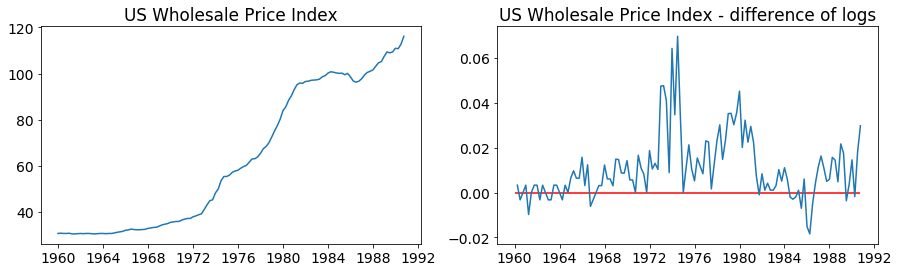

In [30]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

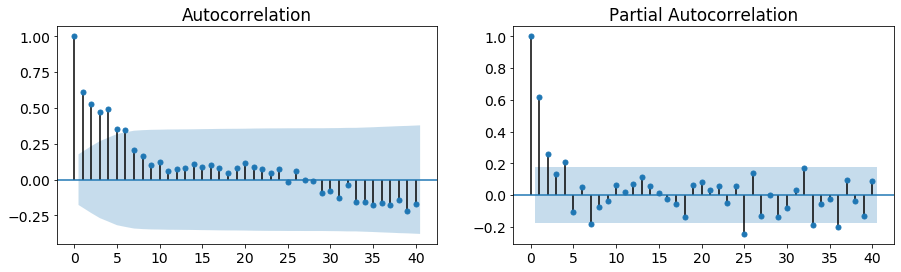

In [31]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[1])

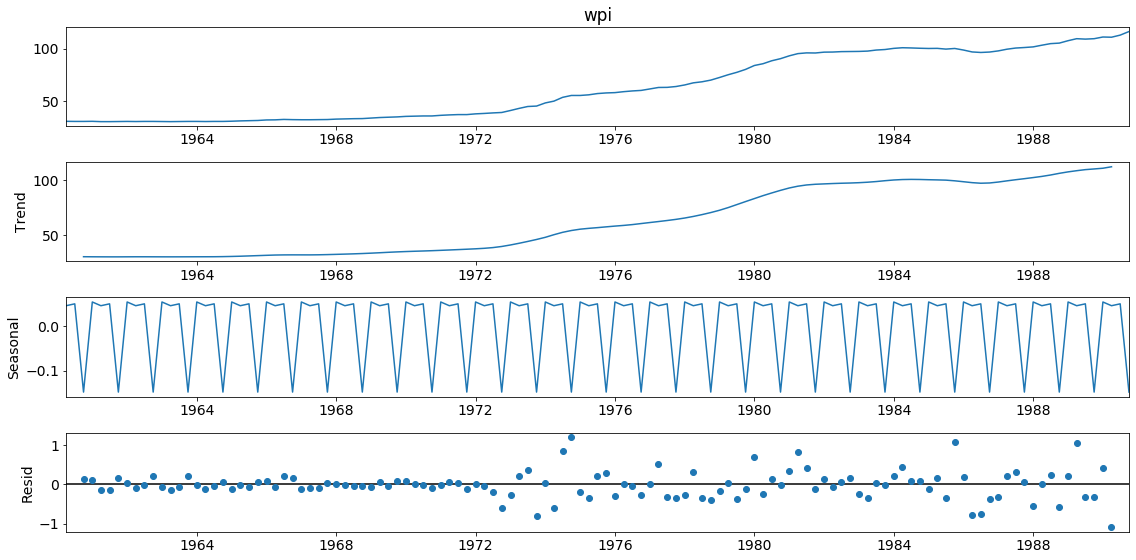

In [32]:
#extract and vis set components
decomposition = sm.tsa.seasonal_decompose(
    data.iloc[1:]['wpi'], model="additive"
)

fig = decomposition.plot()
matplotlib.rcParams["figure.figsize"] = [10.0, 10.0]

In [33]:
#2. Fit the model
mod = sm.tsa.statespace.SARIMAX(data['ln_wpi'], trend='c', order=(1,1,(1,0,0,1)))
res = mod.fit(disp=False)
print(res.summary())

                                 SARIMAX Results                                 
Dep. Variable:                    ln_wpi   No. Observations:                  124
Model:             SARIMAX(1, 1, [1, 4])   Log Likelihood                 386.033
Date:                   Thu, 09 Jun 2022   AIC                           -762.067
Time:                           16:02:07   BIC                           -748.006
Sample:                       01-01-1960   HQIC                          -756.355
                            - 10-01-1990                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.002      1.481      0.139      -0.001       0.006
ar.L1          0.7816      0.094      8.280      0.000       0.597       0.967
ma.L1         -0.4003      0

In [34]:
#2. $my Fit the model - like in video refer to https://www.youtube.com/watch?v=8xt4q7KHfBs
mod = sm.tsa.arima.ARIMA(data.iloc[1:]['wpi'], trend='c', order=(1,1,4))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    wpi   No. Observations:                  123
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -135.243
Date:                Thu, 09 Jun 2022   AIC                            284.485
Time:                        16:02:07   BIC                            304.113
Sample:                    04-01-1960   HQIC                           292.457
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.065e-08    3.2e-11   2516.244      0.000    8.06e-08    8.07e-08
ar.L1          0.8979      0.054     16.629      0.000       0.792       1.004
ma.L1         -0.3682      0.087     -4.244      0.0

In [35]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [36]:
# Dynamic predictions: starting in the first quarter of 1978
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

In [37]:
predict_ci

,lower wpi,upper wpi
t,,
1960-04-01,-1959.965551,1959.965551
1960-07-01,28.322330,33.277746
1960-10-01,29.074699,32.169098
1961-01-01,29.161499,32.201012
1961-04-01,29.370338,32.290756
...,...,...
1989-10-01,107.877189,110.733558
1990-01-01,108.943881,111.800250
1990-04-01,110.620447,113.476817


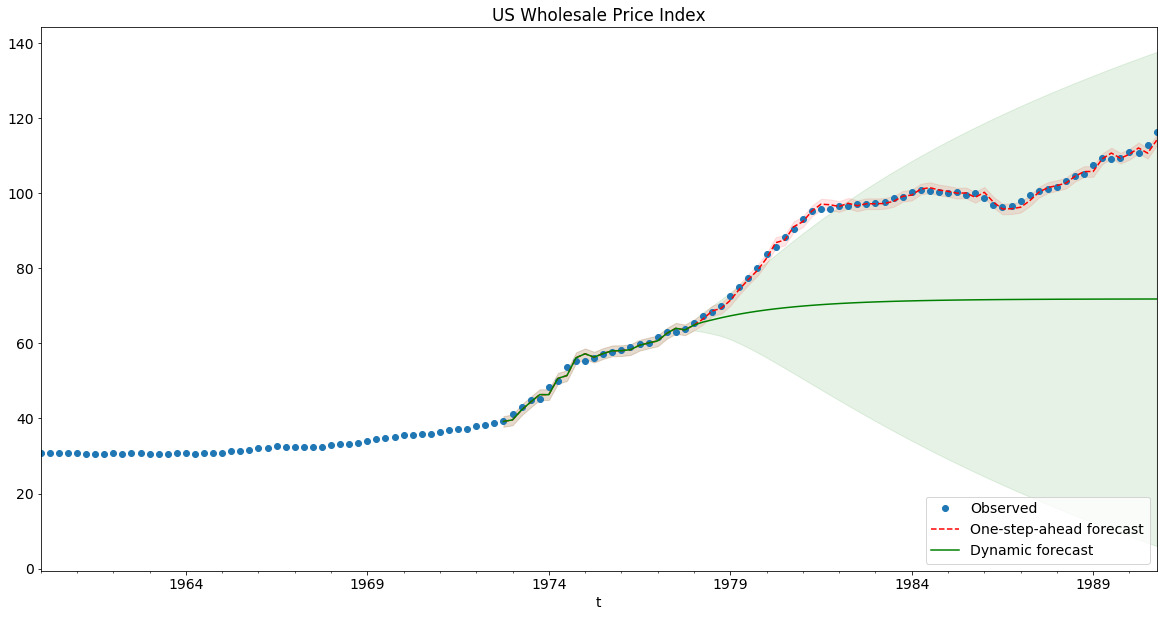

In [38]:
#$my
# graph the one-step-ahead and dynamic predictions (and the corresponding confidence intervals) to see their relative performance. 
#Notice that up to the point where dynamic prediction begins (1978:Q1), the two are the same

# Graph
fig, ax = plt.subplots(figsize=(20,10))
npre = 4
ax.set(title='US Wholesale Price Index', xlabel='Date') #, ylabel='text'

# Plot data points
data['wpi'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1972-10-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1972-10-01':].copy()
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['1972-10-01':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['1972-10-01':].copy()
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

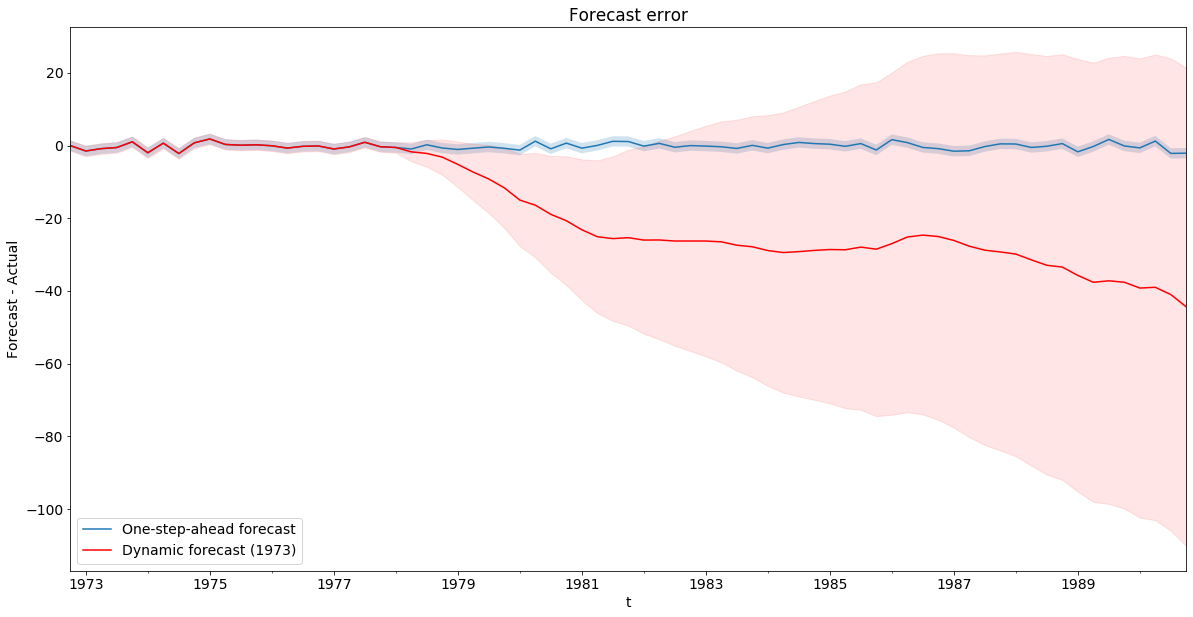

In [39]:
#$my
#graph the prediction error
#It is obvious that, as one would suspect, one-step-ahead prediction is considerably better.
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(20,10))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals

predict_error = predict.predicted_mean - data['wpi']
predict_error.loc['1972-10-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['1972-10-01':].copy()
ci.iloc[:,0] -= data['wpi'].loc['1972-10-01':]
ci.iloc[:,1] -= data['wpi'].loc['1972-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - data['wpi']
predict_dy_error.loc['1972-10-01':].plot(ax=ax, style='r', label='Dynamic forecast (1973)')
ci = predict_dy_ci.loc['1972-10-01':].copy()
ci.iloc[:,0] -= data['wpi'].loc['1972-10-01':]
ci.iloc[:,1] -= data['wpi'].loc['1972-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

plt.show();

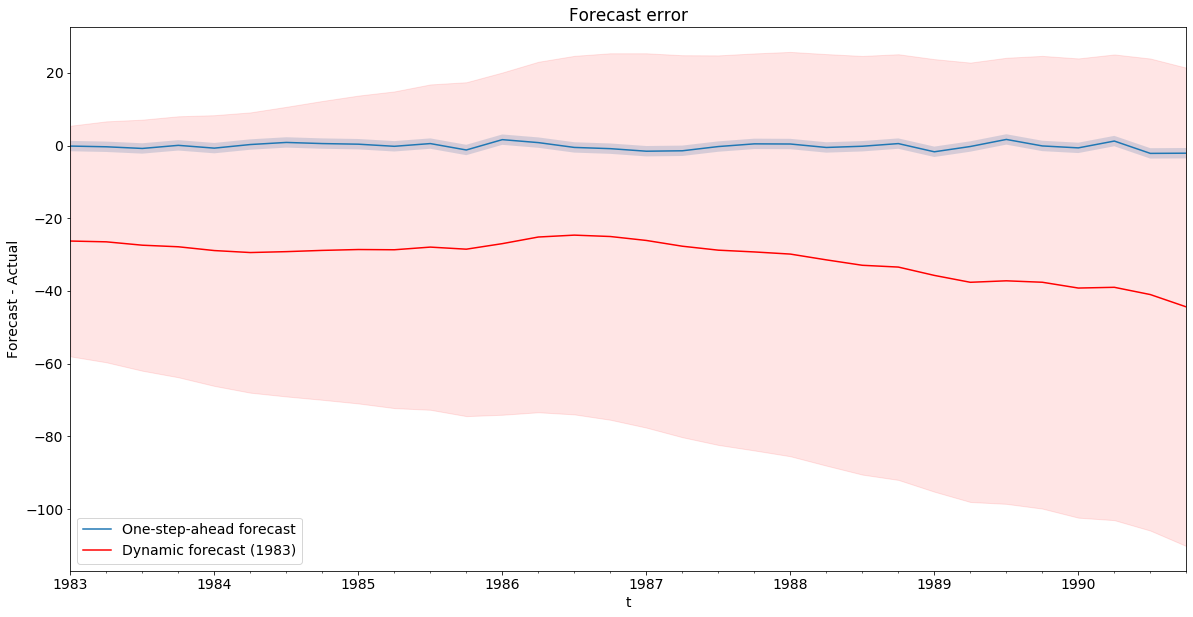

In [40]:
#$my
#graph the prediction error
#It is obvious that, as one would suspect, one-step-ahead prediction is considerably better.
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(20,10))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals

predict_error = predict.predicted_mean - data['wpi']
predict_error.loc['1983-01-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['1983-01-01':].copy()
ci.iloc[:,0] -= data['wpi'].loc['1983-01-01':]
ci.iloc[:,1] -= data['wpi'].loc['1983-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - data['wpi']
predict_dy_error.loc['1983-01-01':].plot(ax=ax, style='r', label='Dynamic forecast (1983)')
ci = predict_dy_ci.loc['1983-01-01':].copy()
ci.iloc[:,0] -= data['wpi'].loc['1983-01-01':]
ci.iloc[:,1] -= data['wpi'].loc['1983-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

plt.show();

In [41]:
mystop

NameError: name 'mystop' is not defined

### Example 3: Airline Model

In [42]:
#0. Load data
#Dataset
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content

#1. Prep data
data = pd.read_stata(BytesIO(air2))
#my save downloaded data
#data.to_csv("my_data/stata_air2_original.csv")

data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
data['ln_air'] = np.log(data['air'])

#preview
print(data.shape)
print(data.dtypes)
data.head()

(144, 4)
air         int16
time      float32
t         float32
ln_air    float32
dtype: object


,air,time,t,ln_air
1949-01-01,112,1949.000000,1.0,4.718499
1949-02-01,118,1949.083374,2.0,4.770685
1949-03-01,132,1949.166626,3.0,4.882802
1949-04-01,129,1949.250000,4.0,4.859812
1949-05-01,121,1949.333374,5.0,4.795791


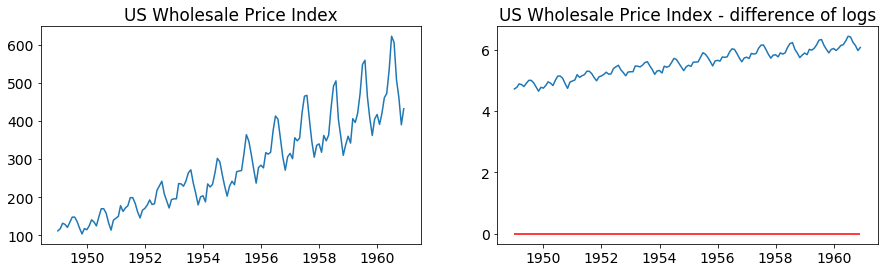

In [43]:
# Graph data $actodo
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['air'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['ln_air'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

`statsmodels` `seasonal_decompose()` to extract and visualize data set components  
Refer to https://github.com/FrancescaLazzeri/Machine-Learning-for-Time-Series-Forecasting/blob/main/Notebooks/Chapter%203%20-%20Time%20Series%20Data%20Preparation%20(1).ipynb

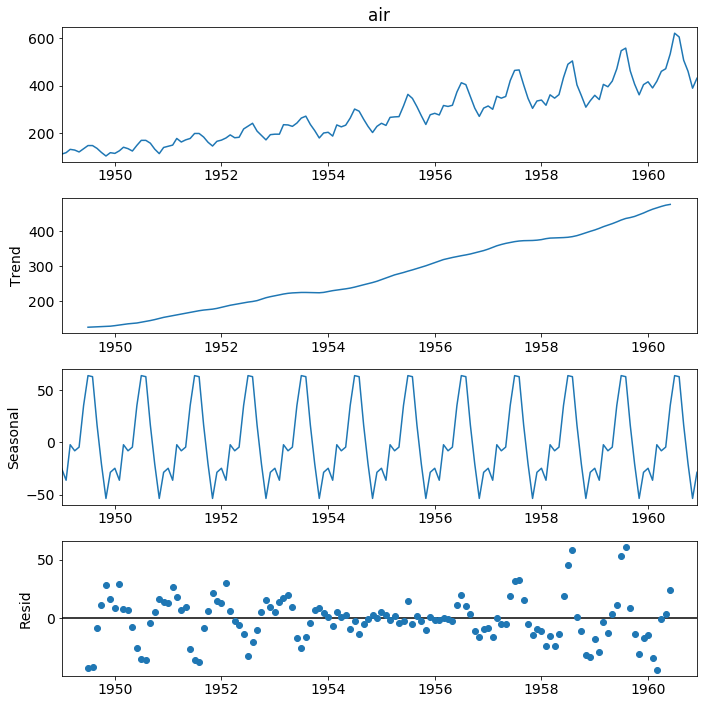

In [44]:
#extract and vis set components
decomposition = sm.tsa.seasonal_decompose(
    data['air'], model="additive"
)

fig = decomposition.plot()
matplotlib.rcParams["figure.figsize"] = [10.0, 10.0]

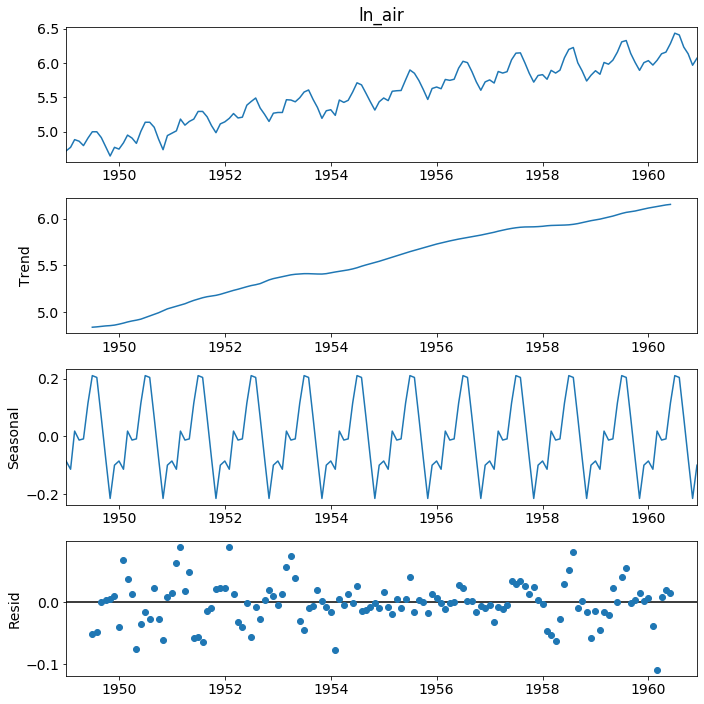

In [45]:
#extract and vis set components
decomposition = sm.tsa.seasonal_decompose(
    data['ln_air'], model="additive"
)

fig = decomposition.plot()
matplotlib.rcParams["figure.figsize"] = [10.0, 10.0]

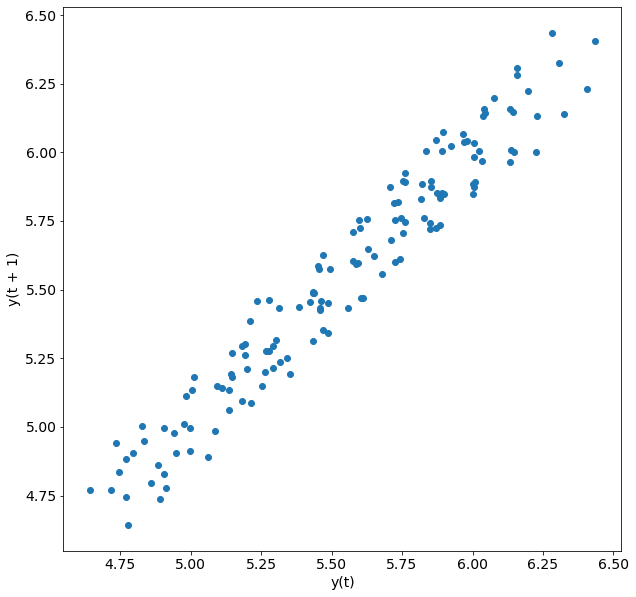

In [47]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(data['ln_air'])

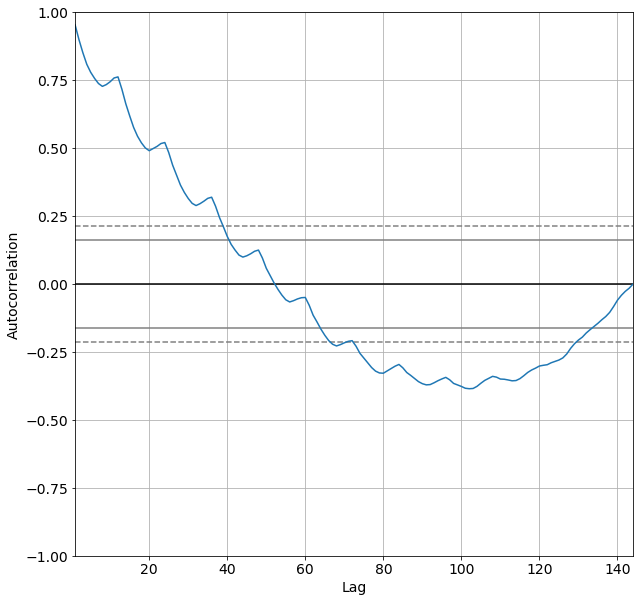

In [48]:
from pandas.plotting import autocorrelation_plot

plt.figure()

autocorrelation_plot(data['ln_air'])

In [46]:
mystop

NameError: name 'mystop' is not defined

In [ ]:
#2. Fit the model
mod = sm.tsa.statespace.SARIMAX(data['ln_air'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

### Example 4: ARMAX (Friedman)
Dataset: theory of money; postulate a straight forward relationship between personal-consumption expenditures (`consump`) and the money supply as measured by `m2`.

In [ ]:
#0. Load data
# Dataset
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content

#1. Prep data
data = pd.read_stata(BytesIO(friedman2))
#my save downloaded data
#data.to_csv("my_data/stata_friedman2_original.csv")

data.index = data.time
data.index.freq = "QS-OCT" #$delta was

#preview
print("dates: ", data.index.min(), data.index.max())
print(data.shape)
print(data.dtypes)
data.head()

In [ ]:
# Graph full data
plt.figure(figsize=(20,6))

# Levels
#plt.plot(data.index._mpl_repr(), data['consump'], 'b-', label='consumption')
#plt.plot(data.index._mpl_repr(), data['m2'], 'g-', label='money supply')
plt.plot(data.index, data['consump'], 'b-', label='consumption')
plt.plot(data.index, data['m2'], 'g-', label='money supply')
plt.title('Consumption & Money Supply - full dataset')
plt.legend();

In [ ]:
#1. Prep data
# Variables
endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

#preview
print("dates: ", endog.index.min(), endog.index.max())
print(endog.shape, exog.shape)
exog.tail()

In [ ]:
# Graph full data
plt.figure(figsize=(20,6))

# Levels
plt.plot(endog.index._mpl_repr(), endog, 'b-', label='endog')
plt.plot(exog.index._mpl_repr(), exog['m2'], 'g-', label='exog')
plt.title('Endog (Consumption) & Exog (Money Supply) - partial dataset')
plt.legend();

In [ ]:
#2. Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

## 2. ARIMA Postestimation
### Example 1 - Dynamic Forecasting

In [ ]:
#1. Prep data
raw = pd.read_stata(BytesIO(friedman2))
raw.index = raw.time
raw.index.freq = "QS-OCT"
data = raw.loc[:'1981']

# Variables
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])
nobs = endog.shape[0]

#preview
print(data.shape)
print(data.dtypes)
data.head()

In [ ]:
#2. Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False, maxiter=250)
print(fit_res.summary())

##### Post Estimation
Get results for the full dataset but using the estimated parameters (on a subset of the data).

In [ ]:
#3. Predict
#get results for the full dataset but using the estimated parameters (on a subset of the data).
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)

##### - in-sample predictions
The `predict` command is first applied here to get in-sample predictions. We use the `full_results=True` argument to allow us to calculate confidence intervals (the default output of predict is just the predicted values).

With no other arguments, `predict` returns the one-step-ahead in-sample predictions for the entire sample.

In [ ]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

We can also get dynamic predictions. One-step-ahead prediction uses the true values of the endogenous values at each step to predict the next in-sample value. Dynamic predictions use one-step-ahead prediction up to some point in the dataset (specified by the `dynamic` argument); after that, the previous predicted endogenous values are used in place of the true endogenous values for each new predicted element.

The dynamic argument is specified to be an offset relative to the `start` argument. If `start` is not specified, it is assumed to be `0`.

In [ ]:
# Dynamic predictions: starting in the first quarter of 1978
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

In [ ]:
# graph the one-step-ahead and dynamic predictions (and the corresponding confidence intervals) to see their relative performance. 
#Notice that up to the point where dynamic prediction begins (1978:Q1), the two are the same

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [ ]:
#graph the prediction error
#It is obvious that, as one would suspect, one-step-ahead prediction is considerably better.
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc['1977-10-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['1977-10-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

## Xtra

In [ ]:
data

In [ ]:
import matplotlib 
decomposition = sm.tsa.seasonal_decompose(
    data['consump'], model="additive"
)

fig = decomposition.plot()
matplotlib.rcParams["figure.figsize"] = [10.0, 6.0]